In [1]:
import cv2 
from matplotlib import pyplot as plt

In [2]:
# Đọc ảnh
img = cv2.imread('table.jpg', cv2.IMREAD_GRAYSCALE)

# Áp dụng thresholding để biến đổi thành ảnh đen trắng
_, binary_img = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV)

# Lưu ảnh tiền xử lý
cv2.imwrite('temp/processed_image.jpg', binary_img)

True

In [4]:
# Dò các đường ngang và dọc để phát hiện bảng
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 1))  # Kernel cho đường ngang
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 25))   # Kernel cho đường dọc

# Tìm các đường kẻ ngang và dọc trong ảnh
horizontal_lines = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
vertical_lines = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, vertical_kernel, iterations=2)

# Kết hợp các đường kẻ để xác định vùng bảng
table_area = cv2.add(horizontal_lines, vertical_lines)

# Lưu vùng bảng
cv2.imwrite('temp/table_area.jpg', table_area)

True

In [5]:
import pytesseract
from PIL import Image

# Nhận dạng văn bản bình thường
text = pytesseract.image_to_string(Image.open('temp/processed_image.jpg'))
print("Recognized Text:\n", text)


Recognized Text:
 Bang so sanh AN DU VA HOAN DU

-Giong nhau: cing duoc xav dung dua trén co s¢ lién trong vé moi quan hé gitra
cac su vat, hién tuong.

Khac nhau

An du

Hoan du

Khai niém

Cac sy vat, hién trong trong phép an
du phai cd nhiing nét tuong , dong voi
nhau (tuong déng vé hinh thie, vé
cach thie, pham chat, vé chuyén di
cam pidc)

Cac sy vat hién tuong trong
phép hoan du co quan hé gan
pili voi nhau (Lay mot bd
phan dé chi toan thé, lay vat
chita dung dé goi vat bi chira
dung, 14) dau hiéu cua su vat
dé gO1 su vat, lay cai cu thé dé
gol cai trizu tuong.).

Vi du

Ngan ngcn: mat trot di qua trén lang,
Thay mot mat troi trong ldng rat do.

(Viéng lang Bac - Vién 2 Phuong)
G hai cau sau, tac gia Vien Phuong
lai su dung bién phap tu tir an du.
Dau hiéu dé nhan biét diéu nay 46 1a
su tuong déng vé pham chat gitra
hinh tugng mat troi va Ho Chi Minh
(su vi dai, cao ca va trrong ton)

Ao cham dica buoi phan ly
(Wigt Bac - Té Hitu)
Ta cé thé hiéu: Newoi Viét
Bac (A) thuong mac 40 

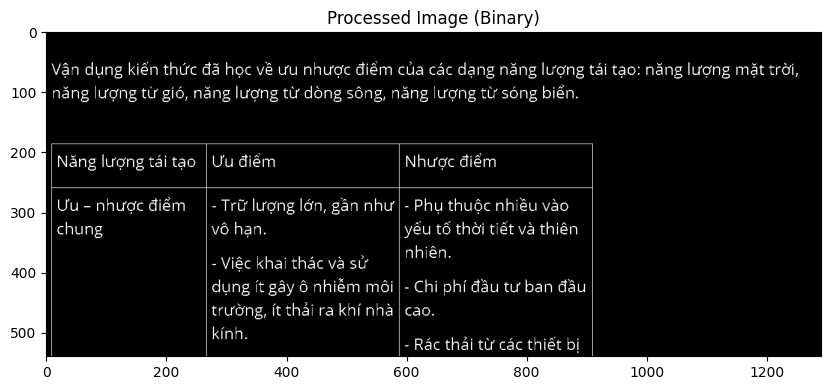

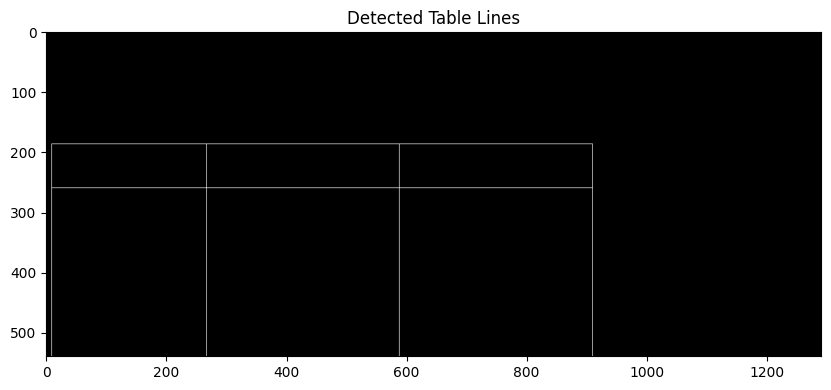

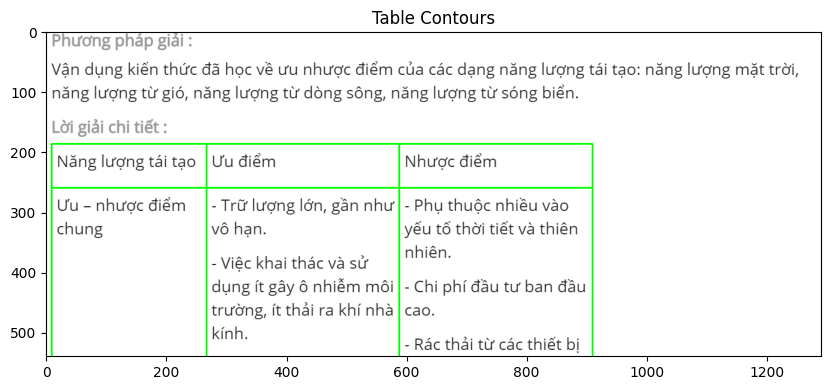

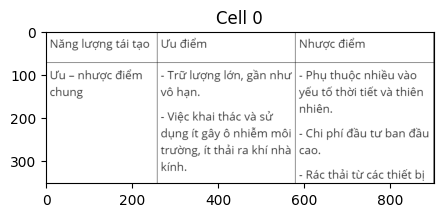

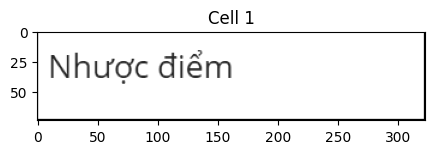

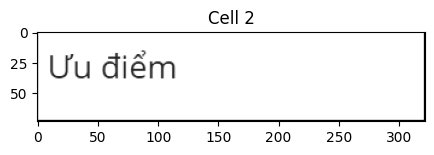

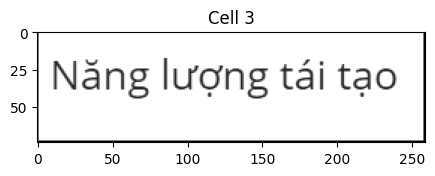

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Bước 1: Đọc ảnh và tiền xử lý
img = cv2.imread('ta1.png', cv2.IMREAD_GRAYSCALE)

# Áp dụng threshold để chuyển ảnh thành đen trắng
_, binary_img = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV)

# Hiển thị ảnh sau tiền xử lý
plt.figure(figsize=(10, 10))
plt.imshow(binary_img, cmap='gray')
plt.title('Processed Image (Binary)')
plt.show()

# Bước 2: Tìm đường kẻ ngang và dọc
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 1))  # Kernel cho đường ngang
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 25))   # Kernel cho đường dọc

# Tìm các đường kẻ ngang
horizontal_lines = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)

# Tìm các đường kẻ dọc
vertical_lines = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, vertical_kernel, iterations=2)

# Bước 3: Kết hợp các đường kẻ ngang và dọc
table_area = cv2.add(horizontal_lines, vertical_lines)

# Hiển thị vùng bảng đã phát hiện
plt.figure(figsize=(10, 10))
plt.imshow(table_area, cmap='gray')
plt.title('Detected Table Lines')
plt.show()

# Bước 4: Tìm các contours (đường viền) để phân chia bảng
contours, hierarchy = cv2.findContours(table_area, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Tạo một bản sao của ảnh gốc để vẽ các contours
img_with_contours = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

# Vẽ contours lên ảnh
cv2.drawContours(img_with_contours, contours, -1, (0, 255, 0), 2)

# Hiển thị ảnh với contours
plt.figure(figsize=(10, 10))
plt.imshow(img_with_contours)
plt.title('Table Contours')
plt.show()

# Bước 5: Chia ảnh thành các ô và lưu lại từng ô
for idx, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)
    
    if w > 50 and h > 20:  # Điều chỉnh ngưỡng để bỏ qua các vùng quá nhỏ
        cell_img = img[y:y+h, x:x+w]
        
        # Lưu từng ô thành file ảnh
        # cell_filename = f'temp/cell_{idx}.png'
        # cv2.imwrite(cell_filename, cell_img)
        
        # Hiển thị từng ô
        plt.figure(figsize=(5, 5))
        plt.imshow(cell_img, cmap='gray')
        plt.title(f'Cell {idx}')
        plt.show()

# Sau khi có các vùng ô, bạn có thể thực hiện OCR trên từng ô.


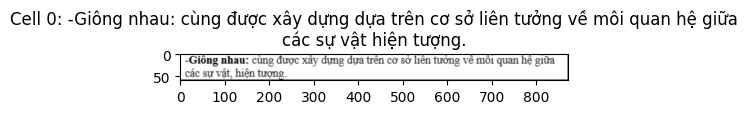

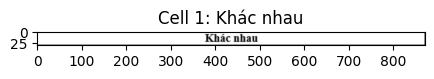

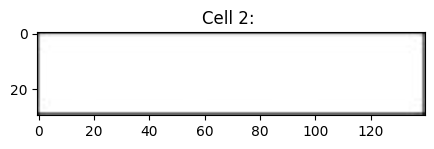

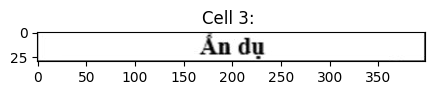

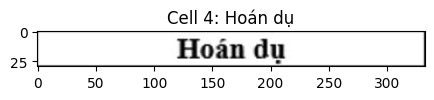

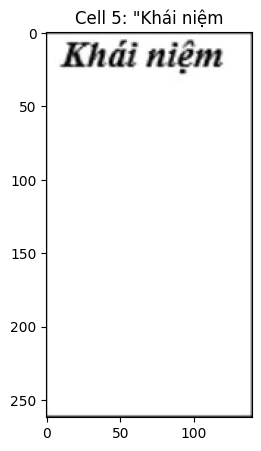

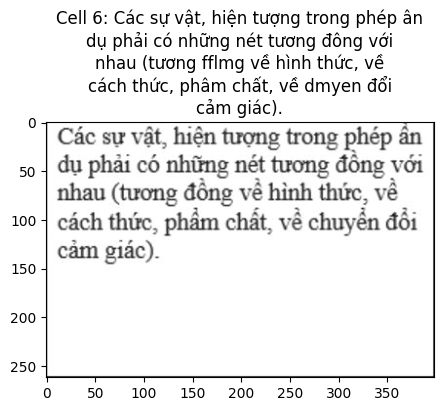

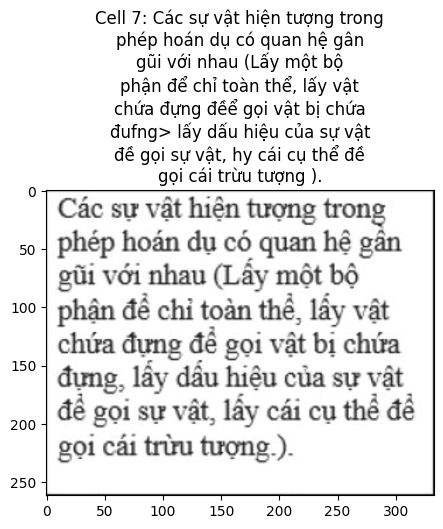

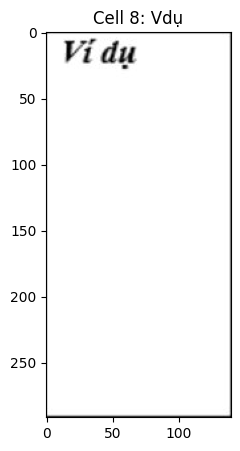

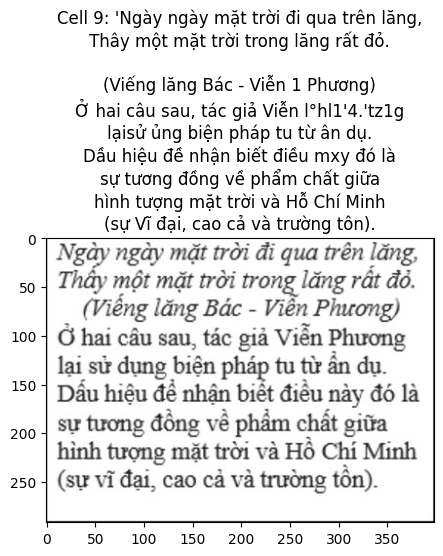

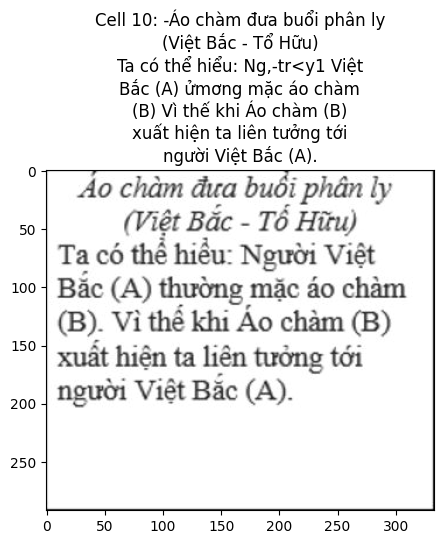

Kết quả OCR cho bảng:
-Giông nhau: cùng được xây dựng dựa trên cơ sở liên tưởng về môi quan hệ giữa
các sự vật hiện tượng.
Khác nhau


Hoán dụ
"Khái niệm
Các sự vật, hiện tượng trong phép ân
dụ phải có những nét tương đông với
nhau (tương fflmg về hình thức, về
cách thức, phâm chất, về dmyen đổi
cảm giác).
Các sự vật hiện tượng trong
phép hoán dụ có quan hệ gân
gũi với nhau (Lấy một bộ
phận để chỉ toàn thể, lấy vật
chứa đựng đềể gọi vật bị chứa
đufng> lấy dấu hiệu của sự vật
đề gọi sự vật, hy cái cụ thể đề
gọi cái trừu tượng ).
Vdụ
'Ngày ngày mặt trời đi qua trên lăng,
Thây một mặt trời trong lăng rất đỏ.

(Viếng lăng Bác - Viễn 1 Phương)
Ở hai câu sau, tác giả Viễn l°hl1'4.'tz1g
lạisử ủng biện pháp tu từ ân dụ.
Dầu hiệu đề nhận biết điều mxy đó là
sự tương đồng về phẩm chất giữa
hình tượng mặt trời và Hỗ Chí Minh
(sự Vĩ đại, cao cả và trường tôn).
-Áo chàm đưa buổi phân ly
(Việt Bắc - Tổ Hữu)
Ta có thể hiểu: Ng,-tr<y1 Việt
Bắc (A) ửmơng mặc áo chàm
(B) Vì thế khi Áo chàm (B)
xuất hiện

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
from PIL import Image

# Đường dẫn tới Tesseract nếu bạn sử dụng Windows
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Bước 1: Đọc ảnh và tiền xử lý
img = cv2.imread('table.jpg', cv2.IMREAD_GRAYSCALE)

# Áp dụng threshold để chuyển ảnh thành đen trắng
_, binary_img = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV)

# Bước 2: Tìm đường kẻ ngang và dọc
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 1))  # Kernel cho đường ngang
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 25))   # Kernel cho đường dọc

# Tìm các đường kẻ ngang và dọc
horizontal_lines = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
vertical_lines = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, vertical_kernel, iterations=2)

# Bước 3: Kết hợp các đường kẻ ngang và dọc
table_area = cv2.add(horizontal_lines, vertical_lines)

# Bước 4: Tìm các contours (đường viền) để phân chia bảng
contours, hierarchy = cv2.findContours(table_area, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Lưu trữ các bounding box của contours
bounding_boxes = [cv2.boundingRect(c) for c in contours]

# Loại bỏ contour đầu tiên nếu nó là toàn bộ bảng lớn (dựa trên kích thước lớn nhất)
# Tìm contour lớn nhất
max_contour = max(bounding_boxes, key=lambda b: b[2] * b[3])

# Loại bỏ contour lớn nhất
bounding_boxes = [b for b in bounding_boxes if b != max_contour]

# Sắp xếp theo vị trí (y, x) để giữ đúng thứ tự bảng
bounding_boxes = sorted(bounding_boxes, key=lambda b: (b[1], b[0]))

# Bước 5: Thực hiện OCR cho từng cell và lưu theo thứ tự hàng và cột
table_data = []
for idx, (x, y, w, h) in enumerate(bounding_boxes):
    if w > 50 and h > 20:  # Điều chỉnh ngưỡng để bỏ qua các vùng quá nhỏ
        cell_img = img[y:y+h, x:x+w]
        
        # OCR cho cell
        text = pytesseract.image_to_string(cell_img, lang='vie').strip()
        
        # Thêm nội dung vào danh sách dữ liệu bảng
        table_data.append((x, y, text))
        
        # Hiển thị từng ô và kết quả OCR
        plt.figure(figsize=(5, 5))
        plt.imshow(cell_img, cmap='gray')
        plt.title(f'Cell {idx}: {text}')
        plt.show()

# Bước 6: Sắp xếp và hiển thị dữ liệu bảng
sorted_table_data = sorted(table_data, key=lambda t: (t[1], t[0]))  # Sắp xếp theo vị trí y (hàng), rồi đến x (cột)

print("Kết quả OCR cho bảng:")
for data in sorted_table_data:
    print(data[2])



In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
from PIL import Image
from docx import Document

# Đường dẫn tới Tesseract nếu bạn sử dụng Windows
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Bước 1: Đọc ảnh và tiền xử lý
img = cv2.imread('table.jpg', cv2.IMREAD_GRAYSCALE)

# Áp dụng threshold để chuyển ảnh thành đen trắng
_, binary_img = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV)

# Bước 2: Tìm đường kẻ ngang và dọc
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 1))  # Kernel cho đường ngang
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 25))   # Kernel cho đường dọc

# Tìm các đường kẻ ngang và dọc
horizontal_lines = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
vertical_lines = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, vertical_kernel, iterations=2)

# Bước 3: Kết hợp các đường kẻ ngang và dọc
table_area = cv2.add(horizontal_lines, vertical_lines)

# Bước 4: Tìm các contours (đường viền) để phân chia bảng
contours, hierarchy = cv2.findContours(table_area, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Lưu trữ các bounding box của contours
bounding_boxes = [cv2.boundingRect(c) for c in contours]

# Loại bỏ contour lớn nhất (toàn bộ bảng lớn)
max_contour = max(bounding_boxes, key=lambda b: b[2] * b[3])
bounding_boxes = [b for b in bounding_boxes if b != max_contour]

# Sắp xếp bounding box theo vị trí (y, x) để giữ đúng thứ tự bảng
bounding_boxes = sorted(bounding_boxes, key=lambda b: (b[1], b[0]))

# Bước 5: Thực hiện OCR cho từng cell và lưu kết quả vào danh sách
table_data = []
for idx, (x, y, w, h) in enumerate(bounding_boxes):
    if w > 50 and h > 20:  # Điều chỉnh ngưỡng để bỏ qua các vùng quá nhỏ
        cell_img = img[y:y+h, x:x+w]
        
        # OCR cho cell
        text = pytesseract.image_to_string(cell_img).strip()
        
        # Thêm nội dung vào danh sách dữ liệu bảng
        table_data.append((x, y, w, h, text))

# Bước 6: Tạo file Word và chèn nội dung bảng
doc = Document()

# Tạo bảng với số hàng và số cột ước tính
# Giả sử bảng có số hàng và cột dựa trên bounding_boxes đã được phát hiện
rows = len(set([y for _, y, _, _, _ in table_data]))  # Số hàng dựa trên giá trị y
cols = len(set([x for x, _, _, _, _ in table_data]))  # Số cột dựa trên giá trị x

# Tạo bảng trong file Word
table = doc.add_table(rows=rows, cols=cols)

# Chèn nội dung vào các ô của bảng
sorted_table_data = sorted(table_data, key=lambda t: (t[1], t[0]))  # Sắp xếp theo vị trí y (hàng), rồi đến x (cột)
row_idx, col_idx = 0, 0
prev_y = sorted_table_data[0][1]

for idx, (x, y, w, h, text) in enumerate(sorted_table_data):
    # Nếu y thay đổi (tức là sang hàng mới), tăng chỉ số hàng và đặt lại chỉ số cột
    if y != prev_y:
        row_idx += 1
        col_idx = 0
        prev_y = y
    
    # Chèn nội dung vào ô tương ứng
    table.cell(row_idx, col_idx).text = text
    col_idx += 1

# Lưu tài liệu thành file .doc
doc.save('output_table.docx')

print("Đã lưu nội dung bảng vào file 'output_table.docx'.")


Đã lưu nội dung bảng vào file 'output_table.docx'.


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
from PIL import Image
from docx import Document
from docx.shared import Pt
from docx.oxml import parse_xml
from docx.oxml.ns import nsdecls

# Đường dẫn tới Tesseract nếu bạn sử dụng Windows
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Bước 1: Đọc ảnh và tiền xử lý
img = cv2.imread('table.jpg', cv2.IMREAD_GRAYSCALE)

# Áp dụng threshold để chuyển ảnh thành đen trắng
_, binary_img = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV)

# Bước 2: Tìm đường kẻ ngang và dọc
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 1))  # Kernel cho đường ngang
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 25))   # Kernel cho đường dọc

# Tìm các đường kẻ ngang và dọc
horizontal_lines = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
vertical_lines = cv2.morphologyEx(binary_img, cv2.MORPH_OPEN, vertical_kernel, iterations=2)

# Bước 3: Kết hợp các đường kẻ ngang và dọc
table_area = cv2.add(horizontal_lines, vertical_lines)

# Bước 4: Tìm các contours (đường viền) để phân chia bảng
contours, hierarchy = cv2.findContours(table_area, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Lưu trữ các bounding box của contours
bounding_boxes = [cv2.boundingRect(c) for c in contours]

# Loại bỏ contour lớn nhất (toàn bộ bảng lớn)
max_contour = max(bounding_boxes, key=lambda b: b[2] * b[3])
bounding_boxes = [b for b in bounding_boxes if b != max_contour]

# Sắp xếp bounding box theo vị trí (y, x) để giữ đúng thứ tự bảng
bounding_boxes = sorted(bounding_boxes, key=lambda b: (b[1], b[0]))

# Bước 5: Thực hiện OCR cho từng cell và lưu kết quả vào danh sách
table_data = []
for idx, (x, y, w, h) in enumerate(bounding_boxes):
    if w > 50 and h > 20:  # Điều chỉnh ngưỡng để bỏ qua các vùng quá nhỏ
        cell_img = img[y:y+h, x:x+w]
        
        # OCR cho cell
        text = pytesseract.image_to_string(cell_img).strip()
        
        # Thêm nội dung vào danh sách dữ liệu bảng
        table_data.append((x, y, w, h, text))

# Bước 6: Tạo file Word và chèn nội dung bảng
doc = Document()

# Tạo bảng với số hàng và số cột ước tính
# Giả sử bảng có số hàng và cột dựa trên bounding_boxes đã được phát hiện
rows = len(set([y for _, y, _, _, _ in table_data]))  # Số hàng dựa trên giá trị y
cols = len(set([x for x, _, _, _, _ in table_data]))  # Số cột dựa trên giá trị x

# Tạo bảng trong file Word
table = doc.add_table(rows=rows, cols=cols)

# Chèn nội dung vào các ô của bảng
sorted_table_data = sorted(table_data, key=lambda t: (t[1], t[0]))  # Sắp xếp theo vị trí y (hàng), rồi đến x (cột)
row_idx, col_idx = 0, 0
prev_y = sorted_table_data[0][1]

for idx, (x, y, w, h, text) in enumerate(sorted_table_data):
    # Nếu y thay đổi (tức là sang hàng mới), tăng chỉ số hàng và đặt lại chỉ số cột
    if y != prev_y:
        row_idx += 1
        col_idx = 0
        prev_y = y
    
    # Chèn nội dung vào ô tương ứng
    cell = table.cell(row_idx, col_idx)
    cell.text = text
    
    # Thêm đường viền cho ô
    cell._element.get_or_add_tcPr().append(parse_xml(r'<w:tcBorders {}>'
                                                      r'<w:left w:val="single" w:sz="4" wspace="0" ws="0"/>'
                                                      r'<w:right w:val="single" w:sz="4" wspace="0" ws="0"/>'
                                                      r'<w:top w:val="single" w:sz="4" wspace="0" ws="0"/>'
                                                      r'<w:bottom w:val="single" w:sz="4" wspace="0" ws="0"/>'
                                                      r'</w:tcBorders>'.format(nsdecls('w'))))

    col_idx += 1

# Lưu tài liệu thành file .doc
doc.save('output_table_with_borders.docx')

print("Đã lưu nội dung bảng vào file 'output_table_with_borders.docx'.")


Đã lưu nội dung bảng vào file 'output_table_with_borders.docx'.
